In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96])>

In [3]:
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [4]:
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

In [5]:
len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

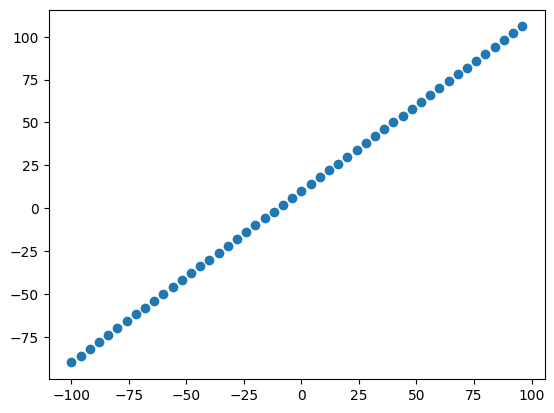

In [6]:
plt.scatter(X,y)
plt.show()

In [15]:
# Lets build a model

tf.random.set_seed(42)

# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, input_shape = [1], name="input_layer"),
    tf.keras.layers.Dense(100, input_shape = [1], name="input_layer_1"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="Tensorflow_32")

# Compile the model
model.compile(loss=tf.losses.mae,
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

In [16]:
model.fit(X_train,y_train, verbose=0, epochs=100)

In [17]:
model.summary()

Model: "Tensorflow_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 100)               200       
                                                                 
 input_layer_1 (Dense)       (None, 100)               10100     
                                                                 
 output_layer (Dense)        (None, 1)                 101       
                                                                 
Total params: 10401 (40.63 KB)
Trainable params: 10401 (40.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [18]:
# Evaluate the model on test
model.evaluate(X_test,y_test)

1/1 [==============================] - 0s 62ms/step - loss: 0.7372 - mae: 0.7372


[0.7371711730957031, 0.7371711730957031]

In [19]:
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 31ms/step


array([[ 70.55183 ],
       [ 74.59301 ],
       [ 78.63421 ],
       [ 82.67538 ],
       [ 86.71658 ],
       [ 90.75776 ],
       [ 94.79896 ],
       [ 98.84016 ],
       [102.881325],
       [106.92253 ]], dtype=float32)

In [21]:
y_true = y_test
y_true

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106])>

In [22]:
# Make functions to reuse mae and mse
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=y_pred)
    
def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                         y_pred=y_pred)

## Running Experiments to improve our model

    Build a model --> fit it --> evaluate it --> tweak it --> fit it --> evaluate it --> tweak it --> fit it --> evaluate it ...

    1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).

    2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer.

    3. Train for longer - Give your model more of a chance to find patterns in the data

In [23]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56])>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66])>)

### Let's do 3 modelling experiments:

     1. model_1 -  Same as the original model, 1 layer, trained for 100 epochs.
     2. model_2 - 2 layers, trained for 100 epochs.
     3. model_3 - 2 layers, trained for 500 epochs.

#### Build model 1

In [28]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.losses.mae,
              optimizer=tf.optimizers.Adam(learning_rate=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X_train, axis = -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 5ms/step - loss: 7.7151 - mae: 7.7151
Epoch 2/100
2/2 [==============================] - 0s 2ms/step - loss: 7.7475 - mae: 7.7475
Epoch 3/100
2/2 [==============================] - 0s 3ms/step - loss: 7.6949 - mae: 7.6949
Epoch 4/100
2/2 [==============================] - 0s 2ms/step - loss: 7.6770 - mae: 7.6770
Epoch 5/100
2/2 [==============================] - 0s 2ms/step - loss: 7.6568 - mae: 7.6568
Epoch 6/100
2/2 [==============================] - 0s 2ms/step - loss: 7.6461 - mae: 7.6461
Epoch 7/100
2/2 [==============================] - 0s 999us/step - loss: 7.6152 - mae: 7.6152
Epoch 8/100
2/2 [==============================] - 0s 4ms/step - loss: 7.6037 - mae: 7.6037
Epoch 9/100
2/2 [==============================] - 0s 3ms/step - loss: 7.5796 - mae: 7.5796
Epoch 10/100
2/2 [==============================] - 0s 3ms/step - loss: 7.5698 - mae: 7.5698
Epoch 11/100
2/2 [==============================] - 0s 3ms/step - loss: 7.609

In [31]:
# model plotting function

def plot_prediction(train_data = X_train,
                    test_data = X_test,
                    train_labels = y_train,
                    test_labels = y_test,
                    predictions = y_pred):
    
    # Plot training data, testing data and compare predictions to ground truth labels
    
    plt.figure(figsize=(15,10))
    
    # Plot the training data in light green
    plt.scatter(train_data, train_labels, c="light green", label="Training Data")
    
    # Plot the testing data in cyan
    plt.scatter(test_data, test_labels, c="cyan", label="Testing Data")
    
    # plot the predictions in orange
    plt.scatter(test_data, predictions, c="orange", label = "Predictions")
    
    plt.legend()
    plt.show()